# Análise de Agrupamento - Dataset Digits

Realize uma análise de agrupamento no conjunto de dados Digits usando o KMeans. Encontre o melhor valor de K, justificando sua resposta. Use o coeficiente de silhueta para verificar se os grupos estão bem formados. O que cada grupo significa? há algum elemento em algum grupo que não deveria estar lá?

PS. Não use informações de rótulo.

# Análise Exploratória

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline

In [ ]:
digits = load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(digits.data.shape)

(1797, 64)


In [ ]:
print(digits.images.shape)

(1797, 8, 8)


In [ ]:
print(digits.target.shape)

(1797,)


In [ ]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

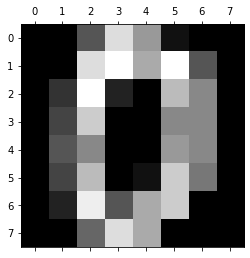

In [ ]:
print(digits.images[0])

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

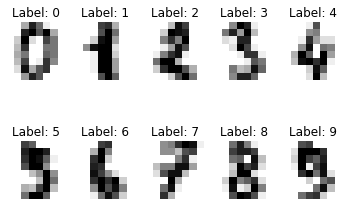

In [ ]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:10]):
    # initialize a subplot of 2X5 at the i+1-th position
    plt.subplot(2, 5, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Label: ' + str(label))

# Show the plot
plt.show()

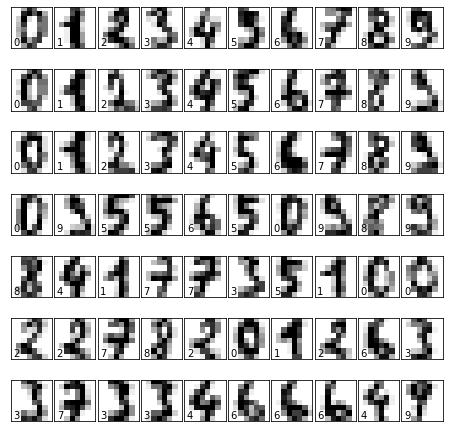

In [ ]:
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 70 images
for i in range(70):
    # Initialize the subplots: add a subplot in the grid of 7 by 10, at the i+1-th position
    ax = fig.add_subplot(7, 10, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

In [ ]:
df_digits = pd.DataFrame(
    digits.data,
    columns=[f'px{i}' for i in range(1, 65)]
)
df_digits['label'] = digits.target

df_digits.head()

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,px13,px14,px15,px16,px17,px18,px19,px20,px21,px22,px23,px24,px25,px26,px27,px28,px29,px30,px31,px32,px33,px34,px35,px36,px37,px38,px39,px40,px41,px42,px43,px44,px45,px46,px47,px48,px49,px50,px51,px52,px53,px54,px55,px56,px57,px58,px59,px60,px61,px62,px63,px64,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   px1     1797 non-null   float64
 1   px2     1797 non-null   float64
 2   px3     1797 non-null   float64
 3   px4     1797 non-null   float64
 4   px5     1797 non-null   float64
 5   px6     1797 non-null   float64
 6   px7     1797 non-null   float64
 7   px8     1797 non-null   float64
 8   px9     1797 non-null   float64
 9   px10    1797 non-null   float64
 10  px11    1797 non-null   float64
 11  px12    1797 non-null   float64
 12  px13    1797 non-null   float64
 13  px14    1797 non-null   float64
 14  px15    1797 non-null   float64
 15  px16    1797 non-null   float64
 16  px17    1797 non-null   float64
 17  px18    1797 non-null   float64
 18  px19    1797 non-null   float64
 19  px20    1797 non-null   float64
 20  px21    1797 non-null   float64
 21  px22    1797 non-null   float64
 22  

In [ ]:
df_digits.describe()

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,px11,px12,px13,px14,px15,px16,px17,px18,px19,px20,px21,px22,px23,px24,px25,px26,px27,px28,px29,px30,px31,px32,px33,px34,px35,px36,px37,px38,px39,px40,px41,px42,px43,px44,px45,px46,px47,px48,px49,px50,px51,px52,px53,px54,px55,px56,px57,px58,px59,px60,px61,px62,px63,px64,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.0

In [ ]:
labels_count = df_digits['label'].value_counts().sort_index()
labels_count.index = [f'Contagem do número {i}:' for i in range(10)]
labels_count

Contagem do número 0:    178
Contagem do número 1:    182
Contagem do número 2:    177
Contagem do número 3:    183
Contagem do número 4:    181
Contagem do número 5:    182
Contagem do número 6:    181
Contagem do número 7:    179
Contagem do número 8:    174
Contagem do número 9:    180
Name: label, dtype: int64

In [ ]:
# Determinar a proporção de cada label em relação ao dataset
labels_proportion = (df_digits['label'].value_counts(normalize=True) * 100).sort_index()
labels_proportion.index = [f'Proporção número {i}:' for i in range(10)]
labels_proportion

Proporção número 0:     9.905398
Proporção número 1:    10.127991
Proporção número 2:     9.849750
Proporção número 3:    10.183639
Proporção número 4:    10.072343
Proporção número 5:    10.127991
Proporção número 6:    10.072343
Proporção número 7:     9.961046
Proporção número 8:     9.682805
Proporção número 9:    10.016694
Name: label, dtype: float64

In [ ]:
# Validando a soma das proporções de cada número
print(f'{labels_proportion.sum()}%')

100.0%


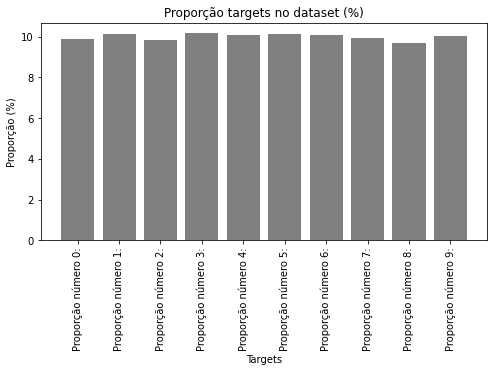

In [ ]:
plt.figure(figsize=(8, 4))

plt.bar(labels_proportion.index, labels_proportion, color='grey')
plt.title("Proporção targets no dataset (%)")
plt.xticks(rotation=90)
plt.xlabel("Targets")
plt.ylabel("Proporção (%)")
plt.show()

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=20)
principal_components = pca.fit_transform(digits.data)

In [ ]:
colors = ['red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'dodgerblue', 'blue', 'magenta', 'purple']

In [ ]:
PCA_components = pd.DataFrame(
    principal_components, 
    columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)]
)

color_map = {
    '0': colors[0],
    '1': colors[1],
    '2': colors[2],
    '3': colors[3],
    '4': colors[4],
    '5': colors[5],
    '6': colors[6],
    '7': colors[7],
    '8': colors[8],
    '9': colors[9]
}

PCA_components['label'] = pd.Series(digits.target, dtype=np.str)
PCA_components['label'] = PCA_components['label'].map(color_map)
PCA_components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,label
0,-1.259467,21.274883,-9.463053,13.014191,-7.128784,-7.440682,3.252666,2.553483,-0.581559,3.626415,2.585766,1.552059,0.849441,-3.334900,5.905799,2.751758,0.426471,-0.880333,0.657136,-3.435366,red
1,7.957611,-20.768698,4.439503,-14.893671,5.896183,-6.485620,2.126308,-4.615885,3.586667,-1.075595,-5.385885,-2.128715,-2.541391,-6.524580,-2.289502,-2.171027,-5.847931,4.454036,-1.904755,-5.202103,orange
2,6.991925,-9.955985,2.958556,-12.288301,-18.126045,-4.507598,1.843435,-16.415319,0.719288,4.254631,-1.232226,-0.386434,0.204329,6.836944,-1.672868,-4.274464,6.717584,1.256539,0.176870,8.692628,yellow
3,-15.906105,3.332467,9.824363,-12.275850,6.965018,1.089516,-1.041491,10.973454,-3.260926,6.496332,-5.066795,2.395025,2.674531,-4.556508,0.800438,1.618653,-2.249665,-1.468152,3.164637,-3.959223,lime
4,23.306867,4.269059,-5.675126,-13.851519,-0.358085,-2.857595,-0.720761,13.041769,-3.834910,13.415338,2.672905,-1.754716,-5.293707,1.522828,-0.670185,-6.385608,-9.511381,-1.952160,-3.121707,5.052492,green


In [ ]:
PCA_components.shape

(1797, 21)

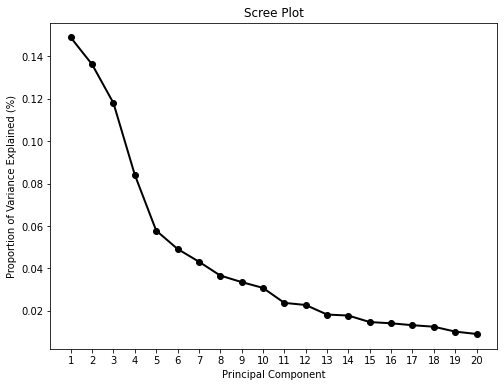

In [ ]:
PC_values = np.arange(pca.n_components_) + 1

plt.figure(figsize=(8, 6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ko-', linewidth=2)
plt.title('Scree Plot')
plt.xticks(PC_values)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (%)')
plt.show()

### Visualizando os dados

In [ ]:
import plotly.express as px

def plot_pca_with_twopcs(X, y, colors, title="PCA Scatter Plot"):
  plt.figure(figsize=(10, 6))

  X_pca = pca.fit_transform(X)

  for i in range(len(colors)):
    x_plot = X_pca[:, 0][y == i]
    y_plot = X_pca[:, 1][y == i]
    plt.scatter(x_plot, y_plot, c=colors[i], alpha=0.9)

  plt.legend(colors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel('First Principal Component')
  plt.ylabel('Second Principal Component')
  plt.title(title)
  plt.show()

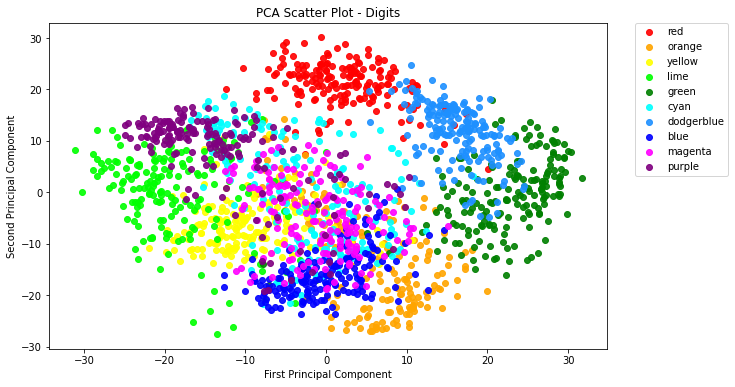

In [ ]:
plot_pca_with_twopcs(digits.data, digits.target, colors, title="PCA Scatter Plot - Digits")

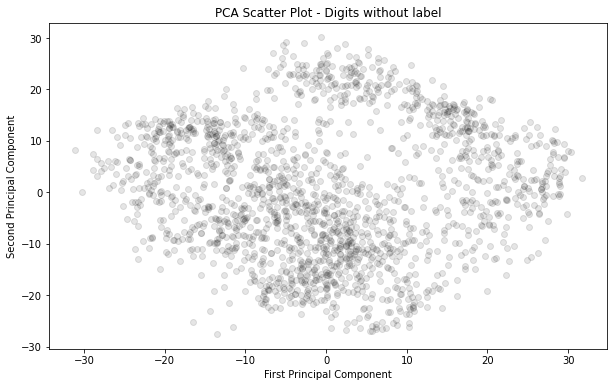

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(PCA_components['PC1'], PCA_components['PC2'], alpha=.1, color='black')
plt.title('PCA Scatter Plot - Digits without label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
label_map = {
    'red': 0,
    'orange': 1,
    'yellow': 2, 
    'lime': 3, 
    'green': 4, 
    'cyan': 5, 
    'dodgerblue': 6, 
    'blue': 7, 
    'magenta': 8, 
    'purple': 9
}

print(PCA_components['label'].map(label_map))

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: label, Length: 1797, dtype: int64


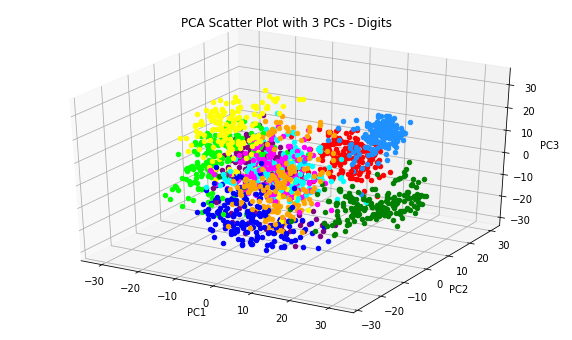

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d') # 111 corresponde às coordendas i,j,k de possíveis subfiguras.

for i in range(len(PCA_components)):
    ax.scatter(PCA_components.iloc[i, 0], PCA_components.iloc[i, 1], PCA_components.iloc[i, 2],c=colors[PCA_components['label'].map(label_map)[i]])

ax.set_title('PCA Scatter Plot with 3 PCs - Digits')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
fig = px.scatter_3d(PCA_components, x='PC1', y='PC2', z='PC3', color='label', color_discrete_sequence=colors)
fig.show()

# Algoritmos de Agrupamento

## K-Means

In [ ]:
from sklearn.cluster import KMeans

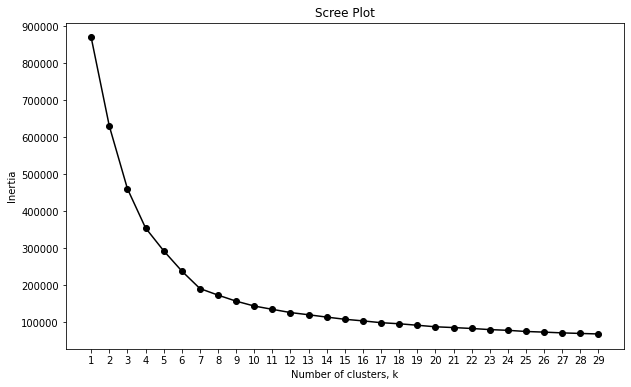

In [ ]:
k_values = range(1, 30)
inertias = []

for k in k_values:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=11)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:, :3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, '-o', color='black')
plt.title('Scree Plot')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X_digits3D = PCA_components.iloc[:, :3]

k_means = KMeans(n_clusters=7, random_state=11)
k_means.fit(X_digits3D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [ ]:
X_digits3D

,PC1,PC2,PC3
0,-1.259467,21.274883,-9.463053
1,7.957611,-20.768698,4.439503
2,6.991925,-9.955985,2.958556
3,-15.906105,3.332467,9.824363
4,23.306867,4.269059,-5.675126
...,...,...,...
1792,-14.606627,13.344123,-13.439041
1793,6.464573,20.567299,-9.155111
1794,10.801282,-6.960254,5.599555
1795,-4.872099,12.423953,-10.170864


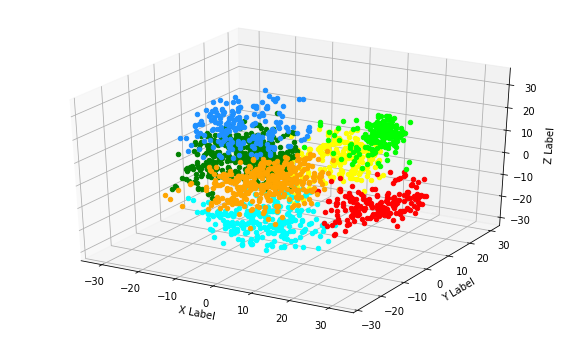

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d') # 111 corresponde às coordendas i,j,k de possíveis subfiguras.
color = ['r','b','k'] # marcadores de cor
mark = ['s','o','^'] # marcadores simbólicos

for i in range(len(X_digits3D)):
    ax.scatter(X_digits3D.iloc[i, 0], X_digits3D.iloc[i, 1], X_digits3D.iloc[i, 2],c=colors[k_means.labels_[i]])

ax.set_xlabel('X Label') # rótulos dos eixos
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

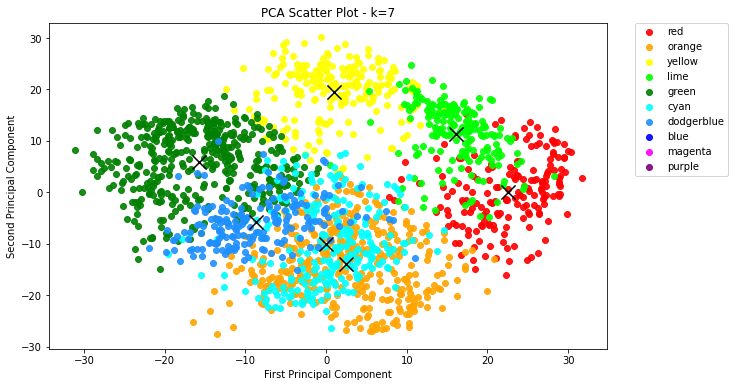

In [ ]:
plt.figure(figsize=(10, 6))

X_pca = pca.fit_transform(digits.data)

for i in range(len(colors)):
  x_plot = X_pca[:, 0][k_means.labels_ == i]
  y_plot = X_pca[:, 1][k_means.labels_ == i]
  plt.scatter(x_plot, y_plot, c=colors[i], alpha=0.9)

# Plot the centroids as a white X
centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3,
            color='black', zorder=10)

plt.legend(colors, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot - k=7')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = range(2, 30)
silhouettes = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=11)
    cluster_labels = clusterer.fit_predict(X_digits3D)
    silhouette_avg = silhouette_score(X_digits3D, cluster_labels)
    silhouettes.append(silhouette_avg)
    print("Para n_clusters =", n_clusters, "O coeficiente de silhoueta é :", silhouette_avg)

Para n_clusters = 2 O coeficiente de silhoueta é : 0.2908087407301938
Para n_clusters = 3 O coeficiente de silhoueta é : 0.3101401415773032
Para n_clusters = 4 O coeficiente de silhoueta é : 0.3148194108620965
Para n_clusters = 5 O coeficiente de silhoueta é : 0.3400206157777
Para n_clusters = 6 O coeficiente de silhoueta é : 0.3637118151898485
Para n_clusters = 7 O coeficiente de silhoueta é : 0.38815237487614923
Para n_clusters = 8 O coeficiente de silhoueta é : 0.3723907955652964
Para n_clusters = 9 O coeficiente de silhoueta é : 0.37022576934330187
Para n_clusters = 10 O coeficiente de silhoueta é : 0.359253302411516
Para n_clusters = 11 O coeficiente de silhoueta é : 0.3575860454382686
Para n_clusters = 12 O coeficiente de silhoueta é : 0.35958550924608296
Para n_clusters = 13 O coeficiente de silhoueta é : 0.35173782719297647
Para n_clusters = 14 O coeficiente de silhoueta é : 0.3546903442272795
Para n_clusters = 15 O coeficiente de silhoueta é : 0.33095735803606546
Para n_cluste

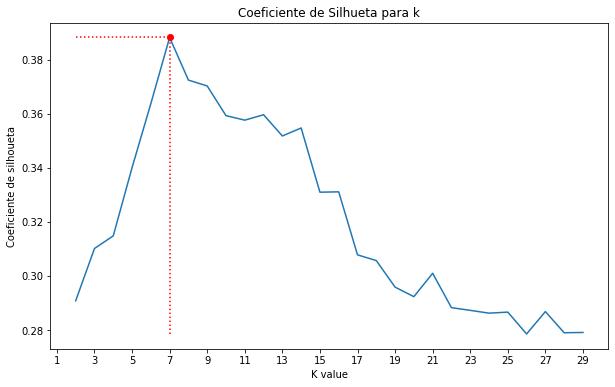

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(range_n_clusters, silhouettes)
plt.plot([7, 7], [min(silhouettes), max(silhouettes)], linestyle = 'dotted', color='red')
plt.plot([2, 7], [max(silhouettes), max(silhouettes)], linestyle = 'dotted', color='red')
plt.plot(7, max(silhouettes), 'ro')
plt.title('Coeficiente de Silhueta para k')
plt.xlabel('K value')
plt.ylabel('Coeficiente de silhoueta')
plt.xticks(range(1, 30, 2))
plt.show()

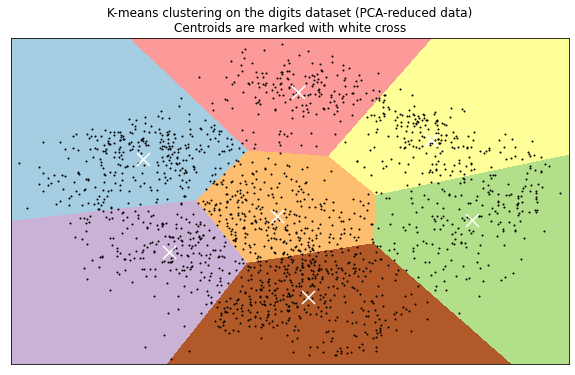

In [ ]:
n_digits = 7

reduced_data = PCA(n_components=2).fit_transform(digits.data)
kmeans_ = KMeans(init="k-means++", n_clusters=n_digits)
kmeans_.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans_.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Avaliando Modelo

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  #print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(digits.target, k_means.labels_)

Confusion matrix, without normalization


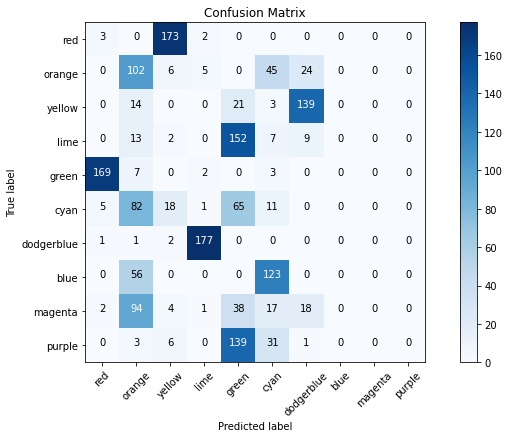

In [ ]:
cm_plot_labels = colors
plt.figure(figsize=(10, 6))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

acc = accuracy_score(digits.target, k_means.labels_)
precision, recall, fscore, _ = precision_recall_fscore_support(digits.target, k_means.labels_)
print("Precision \n", np.mean(precision))
print("\nRecall \n", np.mean(recall))
print("\nF-score \n", np.mean(fscore))
print("\nAccuracy \n", acc)

Precision 
 0.03366935483870968

Recall 
 0.06377330534633906

F-score 
 0.04371235248895217

Accuracy 
 0.06455203116304953


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

